In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from scipy import optimize


In [68]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [69]:
titanic = pd.read_csv(url)

In [70]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [71]:
titanic['sex'].value_counts() 

male      843
female    466
Name: sex, dtype: int64

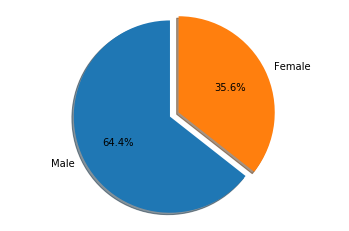

In [72]:
labels = 'Male', 'Female'
sizes = [843,466]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [105]:
Fare= titanic['fare']
Age = titanic['age']
Sex= titanic['sex']

In [106]:
titanic1 = pd.get_dummies(titanic, columns=['sex'] )
titanic1.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


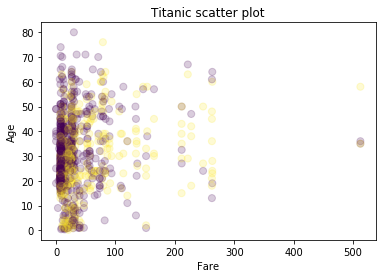

In [107]:
plt.scatter(Fare, Age,  c =titanic1.sex_female ,alpha=0.2 ,s=50);
plt.title('Titanic scatter plot')
plt.xlabel('Fare')
plt.ylabel('Age');

In [109]:
Max= [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min =[ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
Month=[1,2,3,4,5,6,7,8,9,10,11,12]

Text(0, 0.5, 'Min and max temperature')

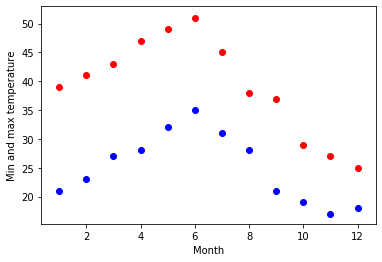

In [115]:
plt.scatter(Month , Min ,c='b')
plt.scatter(Month , Max ,c='r')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [118]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Month,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Month,
                                      Min, [-40, 20, 0])

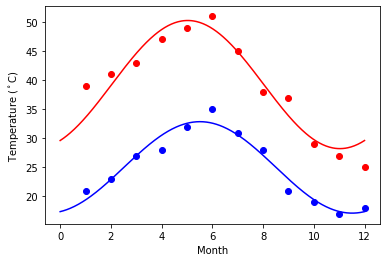

In [120]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()